<a href="https://colab.research.google.com/github/encoras/Artificial-Intelligence-Group/blob/master/Feature_selection_Task_classifier_adult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from  sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report
from sklearn import svm
from numpy.random import seed


# **RAND=22310 # should be your student code abcd**

In [2]:
RAND=5689 # should be your student code abcd
seed(RAND)

from https://drive.google.com/file/d/1-jrwZmZ3kqH-3JbckqbxEsr7EjW27IDJ/view?usp=sharing copy file archive.zip to your folder.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/pooja2512/Adult-Census-Income/refs/heads/master/adult.csv')


In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


**About the Dataset**
```*Age: Describes the age of individuals. Continuous.
*Workclass*: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
*fnlwgt*: Continuous.
*education*: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
*education-num*: Number of years spent in education. Continuous.
*marital-status*: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
*occupation*: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
*relationship*: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
*race*: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
*sex*: Female, Male.
*capital-gain*: Continuous.
*capital-loss*: Continuous.
*hours-per-week*: Continuous.
*native-country*: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
*salary*: >50K,<=50K  ---- CLASSIFICATION Target

```



We can see that the columns workclass, occupation, and native.country contains null values. There can be many ways to impute missing values, but right now, for the sake of simplicity we would impute them using mode!



In [4]:
exclude_atribute=[ "fnlwgt", 'education.num', 'capital.gain', 'capital.loss']
for att in exclude_atribute:
  del df[att]
df.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,90,?,HS-grad,Widowed,?,Not-in-family,White,Female,40,United-States,<=50K
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
2,66,?,Some-college,Widowed,?,Unmarried,Black,Female,40,United-States,<=50K
3,54,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K


In [5]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   marital.status  32561 non-null  object
 4   occupation      30718 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   hours.per.week  32561 non-null  int64 
 9   native.country  31978 non-null  object
 10  income          32561 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.7+ MB


In [6]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-344784494.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [8]:
df

,age,workclass,education,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,90,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,40,United-States,<=50K
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
2,66,Private,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,40,United-States,<=50K
3,54,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
32557,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32558,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32559,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K


Data preparation for a model implementation

In [7]:
from sklearn.preprocessing import LabelEncoder
categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country','income']
label_encoder = LabelEncoder()
for col in categorical:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

from sklearn.model_selection import train_test_split
X = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'hours.per.week']]
y = df['income']

feature_name = ['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'hours.per.week']

In [10]:
X

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,age,hours.per.week
0,3,11,6,9,1,4,0,38,90,40
1,3,11,6,3,1,4,0,38,82,18
2,3,15,6,9,4,2,0,38,66,40
3,3,5,0,6,4,4,0,38,54,40
4,3,15,5,9,3,4,0,38,41,40
...,...,...,...,...,...,...,...,...,...,...
32556,3,15,4,10,1,4,1,38,22,40
32557,3,7,2,12,5,4,0,38,27,38
32558,3,11,2,6,0,4,1,38,40,40
32559,3,11,6,0,4,4,0,38,58,40


#let's split data and do input feature transform.

In [10]:
X_tr, X_te, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RAND, shuffle=True, stratify=y)

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(X_tr)
X_train=scaler.transform(X_tr)
X_test=scaler.transform(X_te)

## Let's implement the baseline model. With THE BEST parameters from the assignment 2 and all features from a dataset.

**The task 1.**
Depending on the last digit of your student Internal code (abcde) take an "optimal" specific *parameter* from the assignment 2.
The RAND variable is your student ID numbers RAND="bcde" at a top of the code.


```
0. DecisionTreeClassifier(criterion='entropy', random_state=RAND, min_samples_split = Variate from 2 till 15000 by some step)
1. DecisionTreeClassifier(criterion='gini', random_state=RAND, max_depth = Variate from 2 till 100)
2. KNeighborsClassifier(n_neighbors=Variate from 2 till 70, p=2)
3. KNeighborsClassifier(n_neighbors='Variate from 2 till 70', p=1)
4. KNeighborsClassifier(n_neighbors=Variate from 2 till 70, weights='distane', p=2)
5. svm.SVC(random_state=RAND, kernel='rbf', gamma=0.07, C=Variate from 1 till 100, tol = 0.01, max_iter = 1000)
6. svm.SVC(random_state=RAND,kernel='poly', degree=3, C=Variate from 1 till 100, tol = 0.01, max_iter = 1000)
7. KNeighborsClassifier(n_neighbors=Variate from 2 till 70, weights='distane', p=1)
8. MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(Variate from 1 till 50,), random_state=RAND)
9. MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(Variate from 1 till 50,5), random_state=RAND)

```



In [14]:
model = --to code--
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
scores_baseline=metrics.accuracy_score(y_test,y_pred)
print("Baseline accuracy = ", scores_baseline)


Baseline accuracy =  0.8142082096427474


In [ ]:
# Plot Confusion matrix
# -- to code --


In [ ]:
print("Baseline metrics:")
print("- Accuracy  = %.3f" % accuracy_score(y_test, y_pred))
print("- ROC AUC   = %.3f" % roc_auc_score(y_test, y_pred))
# compute the classification report
print(classification_report(y_test, y_pred))

-----------------------------------------------------------------------
**Now, let's build your model with feature selection.**
-----------------------------------------------------------------------

In [ ]:
!pip install boruta

#The task 2. features selection by chi2  or f_classif.

2.1 If your student number last digit >5 then to use "chi2", **else**  "f_classif" .


2.2 Find the best number of feature by changing k

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

#features selection by chi2  or f_classif
#if your student number last digit >5 then to use "chi2", else  f_classif
#Find the best number of feature by changing k

chi2_features = SelectKBest(chi2 , k= 5)
#train
chi2_features.fit(abs(X_train), y_train)

print(chi2_features.get_support())
#Apply feature selection and return transformed data
X_train_filtered = --code--
X_test_filtered = --code --

#check your model accuracy with reduced number of features
model.fit(X_train_filtered, y_train)
y_pred = model.predict(X_test_filtered)
score_filtered_chi2=metrics.accuracy_score(y_test,y_pred)

print("Accuracy_K_Best = ", score_filtered_chi2)

#The task 3. features selection by SequentialFeatureSelector.

3.1 If your student number last digit >5 then to use "backward", else "forward" .

3.2 Find the best number of feature by changing n_features_to_select

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(GaussianNB(), direction='backward', n_features_to_select=4)
#train
sfs.fit(X_train, y_train)
#print selected features
print(sfs.get_support())

#Apply feature selection and return transformed data
X_train_filtered = -- to code
X_test_filtered = -- to code
#train your model
model.fit(X_train_filtered, y_train)
y_pred = model.predict(X_test_filtered)
score_filtered_sfs=metrics.accuracy_score(y_test,y_pred)
print("Accuracy_sfs = ", score_filtered_sfs)

#Task 4. Feature selection by Boruta wraper.
4.1 If your student number last digit >5 then to use "rfc", else "etc" .




In [ ]:
#Install Boruta for first time
#!pip install boruta
from boruta import BorutaPy

np.int = np.int32
np.float = np.float64
np.bool = np.bool_

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=RAND)
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state=RAND)

# define Boruta feature selection method by ensamble classifier:  rfc, etc

feat_selector = BorutaPy(--code--, n_estimators='auto', verbose=1, random_state=RAND, max_iter=30) #, max_iter=10

# find all relevant features
feat_selector.fit(X_train, y_train)


# check selected features
print(feat_selector.support_)  #Should we accept the feature

# check ranking of features
print(feat_selector.ranking_) #Rank 1 is the best

In [ ]:
"""
Review the features
"""
# zip feature names, ranks, and decisions
feature_ranks = list(zip(feature_name,
                         feat_selector.ranking_,
                         feat_selector.support_))

# print the results
new_names=[]
for feat in feature_ranks:
    print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))
    if feat[2]:
     new_names.append(feat[0])

In [ ]:
# what features ar most important for a classification task?
new_names

In [24]:
#Apply feature selection and return transformed data
X_train_filtered = -- code --
X_test_filtered = --code --

In [ ]:
#train model
model.fit(X_train_filtered, y_train)
y_pred = model.predict(X_test_filtered)
score_filtered_B=metrics.accuracy_score(y_test,y_pred)
print("Boruta accuracy = ", score_filtered_B)

In [ ]:
#plot confusion matrixes of a classifier with Boruta selected features
#-- to code--



In [ ]:
print("Boruta accuracy metrics:")
print("- Accuracy  = %.3f" % accuracy_score(y_test, y_pred))
print("- ROC AUC   = %.3f" % roc_auc_score(y_test, y_pred))
# compute the classification report
print(classification_report(y_test, y_pred))

#Task 5. Compare Base line classifier accuracy to classifiers with reduced features and make an conclusion of improvement. What features were most oftten selected?

In [ ]:
-- to code --

**Bonus**: https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector

# Sequential Feature Selection and GridSearch
In the following example, we are tuning the SFS's estimator using GridSearch. To avoid unwanted behavior or side-effects, it's recommended to use the estimator inside and outside of SFS as separate instances.

In [13]:
from sklearn.model_selection import GridSearchCV
from mlxtend.evaluate import PredefinedHoldoutSplit
from sklearn.pipeline import Pipeline, make_pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import mlxtend


train_ind, valid_ind = train_test_split(np.arange(X.shape[0]),
                                        test_size=0.2, shuffle=True,
                                        random_state=123, stratify=y)

knn1 = GaussianNB() #
knn2 = KNeighborsClassifier() # should be yuour classifier "model"

sfs1 = SFS(estimator=knn1,
           k_features=3,
           forward=True,
           floating=False,
           scoring='accuracy',
           cv=5)

pipe = Pipeline([('sfs', sfs1),
                      ('scaler', StandardScaler()),
                     ('knn2', knn2)])

params = {'scaler': [MinMaxScaler(), StandardScaler(), 'passthrough'],
          'sfs__k_features': [2, 3, 4, 5],
          # inner knn
          }

split = PredefinedHoldoutSplit(valid_indices=valid_ind)

# Step 5: Grid Search with Predefined Holdout Split
grid = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    cv=split,
    n_jobs=-1,
    scoring='accuracy'
)

# Step 6: Fit model
grid.fit(X, y)

# Step 7: Best results
print("Best parameters found:", grid.best_params_)
print("Best validation accuracy: %.2f" % grid.best_score_)

Best parameters found: {'scaler': MinMaxScaler(), 'sfs__k_features': 4}
Best validation accuracy: 0.81


In [14]:
print("Best parameters via GridSearch", grid.best_params_)

Best parameters via GridSearch {'scaler': MinMaxScaler(), 'sfs__k_features': 4}


In [15]:
pipe.set_params(**grid.best_params_).fit(X_train, y_train)

Pipeline(steps=[('sfs',
                 SequentialFeatureSelector(estimator=GaussianNB(),
                                           k_features=(4, 4),
                                           scoring='accuracy')),
                ('scaler', MinMaxScaler()), ('knn2', KNeighborsClassifier())])

# Selecting the "best" feature combination in a k-range
If `k_features` is set to to a tuple (`min_k, max_k`) (new in 0.4.2), the SFS will now select the best feature combination that it discovered by iterating from k=1 to max_k (forward), or max_k to min_k (backward). The size of the returned feature subset is then within max_k to min_k, depending on which combination scored best during cross validation.

best combination (ACC: 0.806): (1, 2, 4, 5, 9)

all subsets:
 {1: {'feature_idx': (1,), 'cv_scores': array([0.75915771, 0.75915771, 0.74111452, 0.78258008, 0.76327337]), 'avg_score': np.float64(0.7610566776910905), 'feature_names': ('1',)}, 2: {'feature_idx': (1, 4), 'cv_scores': array([0.77560869, 0.81026541, 0.77073278, 0.80408074, 0.79157525]), 'avg_score': np.float64(0.7904525724398772), 'feature_names': ('1', '4')}, 3: {'feature_idx': (1, 4, 9), 'cv_scores': array([0.80916868, 0.80697521, 0.79837648, 0.79003949, 0.79201404]), 'avg_score': np.float64(0.799314780873576), 'feature_names': ('1', '4', '9')}, 4: {'feature_idx': (1, 4, 5, 9), 'cv_scores': array([0.79534986, 0.80916868, 0.80473892, 0.8056165 , 0.79859588]), 'avg_score': np.float64(0.8026939658387553), 'feature_names': ('1', '4', '5', '9')}, 5: {'feature_idx': (1, 2, 4, 5, 9), 'cv_scores': array([0.80236894, 0.81596841, 0.80078982, 0.81110136, 0.79793769]), 'avg_score': np.float64(0.8056332453990924), 'feature_names': ('1'

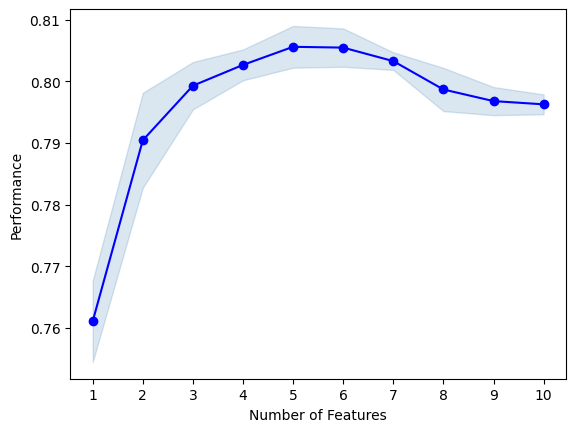

In [17]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
knn = KNeighborsClassifier(n_neighbors=3)

sfs1 = SFS(estimator=knn,
           k_features=(3, 10),
           forward=True,
           floating=False,
           scoring='accuracy',
           cv=5)

pipe = make_pipeline(StandardScaler(), sfs1)

pipe.fit(X_train, y_train)

print('best combination (ACC: %.3f): %s\n' % (sfs1.k_score_, sfs1.k_feature_idx_))
print('all subsets:\n', sfs1.subsets_)
plot_sfs(sfs1.get_metric_dict(), kind='std_err');